In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline 


In [586]:
df1=pd.read_csv('2015.csv')
df2=pd.read_csv('2016.csv')
df3=pd.read_csv('2017.csv')
df4=pd.read_csv('2018.csv')
df5=pd.read_csv('2019.csv')


Our goal is make supper data set of all years with each country as index,but before that we need to make all currently available Dataframe with same index and columns.

In [587]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(158, 12)
(157, 13)
(155, 12)
(156, 9)
(156, 9)


In [588]:
print("2015 Dataframe columns : ")
print(df1.columns,"\n")
print("2016 Dataframe columns : ")
print(df2.columns,"\n")
print("2017 Dataframe columns : ")
print(df3.columns,"\n")
print("2018 Dataframe columns : ")
print(df4.columns,"\n")
print("2019 Dataframe columns : ")
print(df5.columns,"\n")

2015 Dataframe columns : 
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 

2016 Dataframe columns : 
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 

2017 Dataframe columns : 
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 

2018 Dataframe columns : 
Index(['Overall rank', '

As we can See that all the Dataframes have different index and columns, so we need to make them same.
to make our Consistent Dataframe we will follow these steps:

In [589]:
df1.drop(["Standard Error", "Dystopia Residual"], axis = 1, inplace= True)
df2.drop(["Lower Confidence Interval", "Upper Confidence Interval", "Dystopia Residual"], axis = 1, inplace= True)
df3.drop(["Whisker.high", "Whisker.low","Dystopia.Residual"], axis = 1, inplace= True)

In [590]:
df1.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Corruption_perception', 'Generosity']

df2.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Corruption_perception', 'Generosity']

df3.columns = ['Country', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Generosity','Corruption_perception']

df4.columns = ['Happiness_Rank', 'Country', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Generosity','Corruption_perception']

df5.columns = ['Happiness_Rank', 'Country', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Generosity','Corruption_perception']

In [591]:
df1 = df1.set_index("Country")
df2 = df2.set_index("Country")
df3 = df3.set_index("Country")
df4 = df4.set_index("Country")
df5 = df5.set_index("Country")


In [592]:
df1["Year"] = "2015"
df2["Year"] = "2016"
df3["Year"] = "2017"
df4["Year"] = "2018"
df5["Year"] = "2019"

In [593]:
df = pd.concat([df1,df2])
print(df.shape)
df.head()

(315, 10)


,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Year
Country,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


Now we need to add Region in Our Dataframe,

In [594]:
country_region = pd.DataFrame(df['Region'])
country_region.reset_index().drop_duplicates(subset='Country', inplace= True)
country_region = pd.Series(country_region.Region, index= country_region.index).to_dict()

In [595]:
df3["Region"] = df3.index.map(country_region)
df4["Region"] = df4.index.map(country_region)
df5["Region"] = df5.index.map(country_region)


In [596]:
df = pd.concat([df, df3, df4, df5])

From Here WE have our Data Complete Dataframe with all years and all countries with their respective Region.

In [597]:
df.head(5)

,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Year
Country,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


Lets Have look at our Dataframe for missing values and other things.

In [598]:
df.isnull().sum()

Region                   8
Happiness_Rank           0
Happiness_Score          0
GDP_per_capita           0
Family                   0
Health                   0
Freedom                  0
Corruption_perception    1
Generosity               0
Year                     0
dtype: int64

Lets have look at region coulmn and see if there is any missing value in it.

In [599]:
df = df.reset_index().drop_duplicates(subset='Country', keep='first').set_index('Country')


In [600]:
df[df['Region'].isnull()]

,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Year
Country,,,,,,,,,,
Taiwan Province of China,NaN,33,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2017
"Hong Kong S.A.R., China",NaN,71,5.472,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,2017
Trinidad & Tobago,NaN,38,6.192,1.223000,1.492000,0.564000,0.575000,0.019000,0.171000,2018
Northern Cyprus,NaN,58,5.835,1.229000,1.211000,0.909000,0.495000,0.154000,0.179000,2018
North Macedonia,NaN,84,5.274,0.983000,1.294000,0.838000,0.345000,0.034000,0.185000,2019
Gambia,NaN,120,4.516,0.308000,0.939000,0.428000,0.382000,0.167000,0.269000,2019


In [601]:
df.rename(index={'Taiwan Province of China':'Taiwan'},inplace=True)
df.rename(index={'Hong Kong S.A.R., China':'Hong Kong'},inplace=True)
df.rename(index={'Trinidad & Tobago':'Trinidad and Tobago'},inplace=True)
df.rename(index={'Northern Cyprus':'North Cyprus'},inplace=True)
df.rename(index={'North Macedonia':'Macedonia'},inplace=True)
df.rename(index={'Gambia':'The Gambia'},inplace=True)



In [602]:
print(df['Region'].unique())

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia' nan]


In [603]:

df.loc["Taiwan","Region"] = country_region.get("Taiwan")
df.loc["Hong Kong","Region"] = country_region.get("Hong Kong")
df.loc["Trinidad and Tobago","Region"] = country_region.get("Trinidad and Tobago")
df.loc["North Cyprus","Region"] = country_region.get("North Cyprus")
df.loc["Macedonia","Region"] = country_region.get("Macedonia")
df.loc['The Gambia',"Region"] = country_region.get("Sub-Saharan Africa")


In [604]:
df=df.dropna(subset=['Region'])

In [605]:
df[df['Region'].isnull()]

,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Year
Country,,,,,,,,,,


Finally we have our Dataframe with all countries with their respective Region with any Incorrect Data.

In [606]:
print(df.dtypes)

Region                    object
Happiness_Rank             int64
Happiness_Score          float64
GDP_per_capita           float64
Family                   float64
Health                   float64
Freedom                  float64
Corruption_perception    float64
Generosity               float64
Year                      object
dtype: object


(0.0, 7.8244)

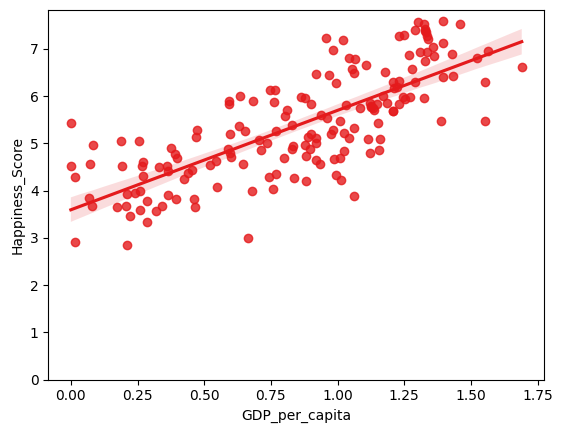

In [607]:
#simple Regression plot
sns.regplot(x="GDP_per_capita", y="Happiness_Score", data=df)
plt.ylim(0,)

By analyzing above plot we can conclude Direct relation between GDP_Per_Capita and Happiness_Score, as GDP_Per_Capita increases Happiness_Score also increases.

In [608]:
df[["GDP_per_capita", "Happiness_Score"]].corr()

,GDP_per_capita,Happiness_Score
GDP_per_capita,1.000000,0.764181
Happiness_Score,0.764181,1.000000


(0.0, 7.86166343048794)

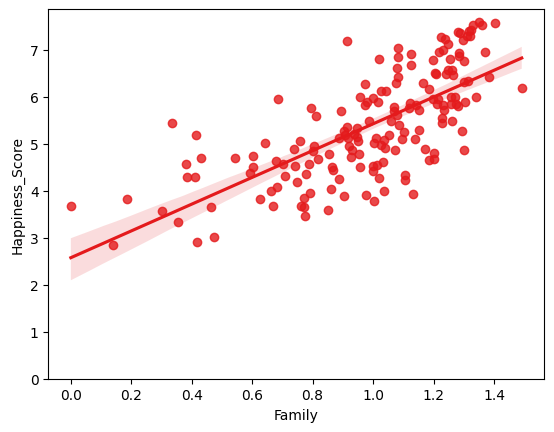

In [609]:
# 'Family' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Family", y="Happiness_Score", data=df)
plt.ylim(0,)

In [610]:
# Examine the correlation between 'Family' and 'Happiness_Score':

df[["Family", "Happiness_Score"]].corr()

,Family,Happiness_Score
Family,1.000000,0.717134
Happiness_Score,0.717134,1.000000


In [611]:
# Examine the correlation between 'Family' and 'Happiness_Score':

df[["Family", "Happiness_Score"]].corr()


,Family,Happiness_Score
Family,1.000000,0.717134
Happiness_Score,0.717134,1.000000


(0.0, 7.8244)

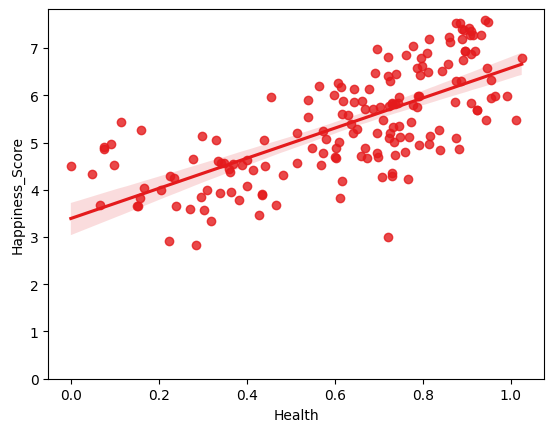

In [612]:
# 'Health' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Health", y="Happiness_Score", data=df)
plt.ylim(0,)

In [613]:
# Examine the correlation between 'Health' and 'Happiness_Score':

df[["Health", "Happiness_Score"]].corr()

,Health,Happiness_Score
Health,1.000000,0.707145
Happiness_Score,0.707145,1.000000


(0.0, 7.8244)

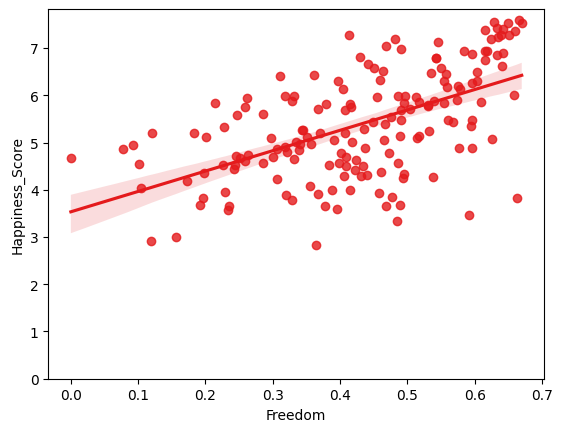

In [614]:
# 'Freedom' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Freedom", y="Happiness_Score", data=df)
plt.ylim(0,)


In [615]:
# Examine the correlation between 'Freedom' and 'Happiness_Score':

df[["Freedom", "Happiness_Score"]].corr()

,Freedom,Happiness_Score
Freedom,1.000000,0.566701
Happiness_Score,0.566701,1.000000


(0.0, 7.8244)

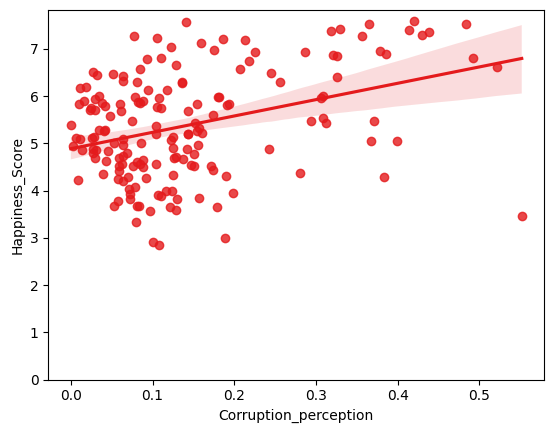

In [616]:
# 'Corruption_perception' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Corruption_perception", y="Happiness_Score", data=df)
plt.ylim(0,)

In [617]:
# Examine the correlation between 'Corruption_perception' and 'Happiness_Score':

df[["Corruption_perception", "Happiness_Score"]].corr()

,Corruption_perception,Happiness_Score
Corruption_perception,1.000000,0.366505
Happiness_Score,0.366505,1.000000


(0.0, 7.8244)

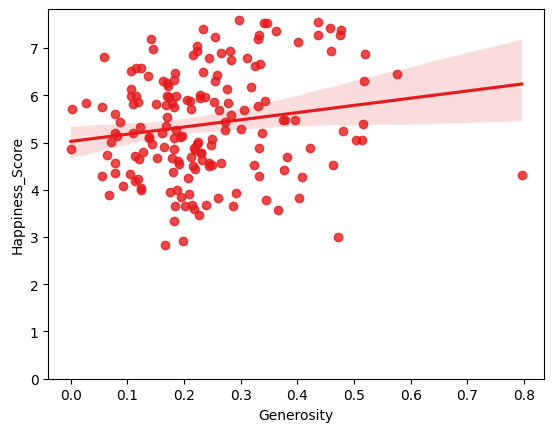

In [618]:
# 'Generosity' as potential predictor variable of 'Happiness_Score':

sns.regplot(x="Generosity", y="Happiness_Score", data=df)
plt.ylim(0,)

In [619]:
# Examine the correlation between 'Generosity' and 'Happiness_Score':

df[["Generosity", "Happiness_Score"]].corr()

,Generosity,Happiness_Score
Generosity,1.000000,0.169808
Happiness_Score,0.169808,1.000000


Descriptive Statistical Analysis¶
Happiness Score statistics per Region¶

In [620]:
df.groupby(["Year","Region"])["Happiness_Score"].agg(["max","min","mean","size"])

max    min      mean  size
Year Region                                                       
2015 Australia and New Zealand        7.286  7.284  7.285000     2
     Central and Eastern Europe       6.505  4.218  5.332931    29
     Eastern Asia                     6.298  4.874  5.626167     6
     Latin America and Caribbean      7.226  4.518  6.144682    22
     Middle East and Northern Africa  7.278  3.006  5.406900    20
     North America                    7.427  7.119  7.273000     2
     Southeastern Asia                6.798  3.819  5.317444     9
     Southern Asia                    5.253  3.575  4.580857     7
     Sub-Saharan Africa               5.477  2.839  4.202800    40
     Western Europe                   7.587  4.857  6.689619    21
2016 Latin America and Caribbean      7.039  5.956  6.497500     2
     Sub-Saharan Africa               5.440  3.832  4.725750     4
2017 Eastern Asia                     6.422  5.472  5.947000     2
2018 Latin America and Caribbean      6.192  6.192  6.192000     1
     Western Europe                   5.835  5.835  5.835000     1
2019 Central and Eastern Europe       5.274  5.274  5.274000     1

In [621]:
# Let's get only 2019 data

df[df['Year']=="2019"].groupby(["Region"])["Happiness_Score"].agg(["mean","size"])

,mean,size
Region,,
Central and Eastern Europe,5.274,1


In [622]:
# Define the dataframe 'Happiness_per_region' (we take the mean value for our indicators over the years so we only group by Region):

happiness_per_region = pd.DataFrame(df.groupby(["Region"])["Happiness_Score"].mean()).sort_values(by=["Happiness_Score"], ascending=False)

In [623]:
happiness_per_region

,Happiness_Score
Region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.650773
Latin America and Caribbean,6.174800
Eastern Asia,5.706375
Middle East and Northern Africa,5.406900
Central and Eastern Europe,5.330967
Southeastern Asia,5.317444
Southern Asia,4.580857


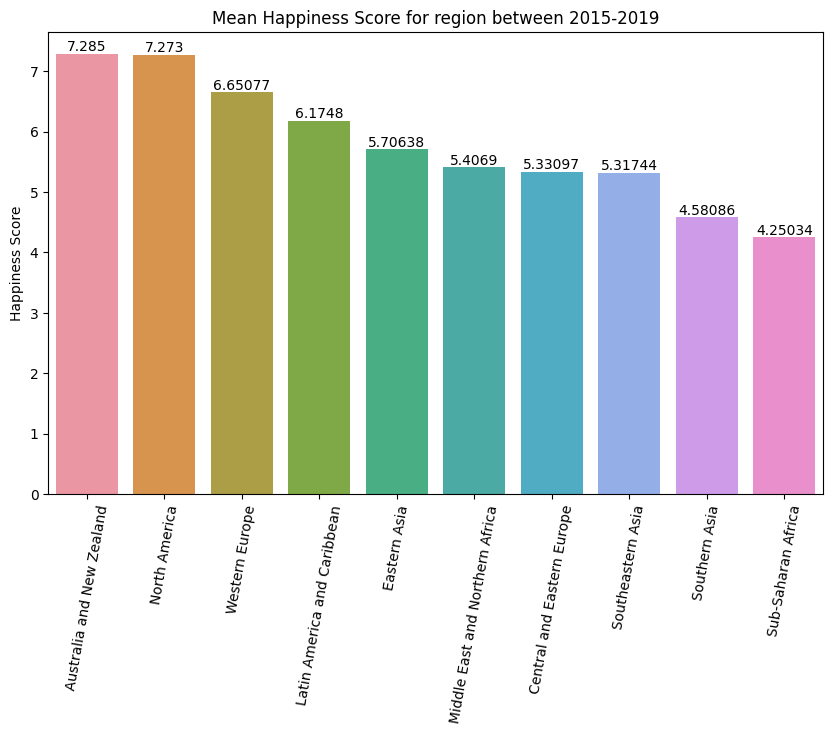

In [624]:
# Plot the average Happiness Score value for each region (from 2015 to 2019). 

# Set our barplot colors palette:    
sns.set_palette("Set1")

# Set our graph size:               
plt.figure(figsize=(10,6))

# Plot our data
ax = sns.barplot(data = happiness_per_region.reset_index(), x="Region", y="Happiness_Score")

# Add labels vertical inclination to improve improve legibility
plt.xticks(rotation=80)
plt.title("Mean Happiness Score for region between 2015-2019")
plt.ylabel("Happiness Score")

# Add column values
ax.set(xlabel=None)
for i in ax.containers:
    ax.bar_label(i,)

In [625]:
# Prepare data to have the evolution of the Happiness Score over years per region:

df_hs_region_years = pd.DataFrame(df.groupby(["Year","Region"])["Happiness_Score"].mean())
df_hs_region_years= df_hs_region_years.reset_index().pivot(index = "Region", columns="Year")

df_hs_region_years = pd.DataFrame(df_hs_region_years.droplevel(0, axis=1))

In [626]:
df_hs_region_years

Year,2015,2016,2017,2018,2019
Region,,,,,
Australia and New Zealand,7.285000,NaN,NaN,NaN,NaN
Central and Eastern Europe,5.332931,NaN,NaN,NaN,5.274
Eastern Asia,5.626167,NaN,5.947,NaN,NaN
Latin America and Caribbean,6.144682,6.49750,NaN,6.192,NaN
Middle East and Northern Africa,5.406900,NaN,NaN,NaN,NaN
North America,7.273000,NaN,NaN,NaN,NaN
Southeastern Asia,5.317444,NaN,NaN,NaN,NaN
Southern Asia,4.580857,NaN,NaN,NaN,NaN
Sub-Saharan Africa,4.202800,4.72575,NaN,NaN,NaN


In [627]:
years = ["2015","2016","2017","2018","2019"]
df_hs_region_years.transpose()

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2015,7.285,5.332931,5.626167,6.144682,5.4069,7.273,5.317444,4.580857,4.20280,6.689619
2016,NaN,NaN,NaN,6.497500,NaN,NaN,NaN,NaN,4.72575,NaN
2017,NaN,NaN,5.947000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,6.192000,NaN,NaN,NaN,NaN,NaN,5.835000
2019,NaN,5.274000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Happiness Score')

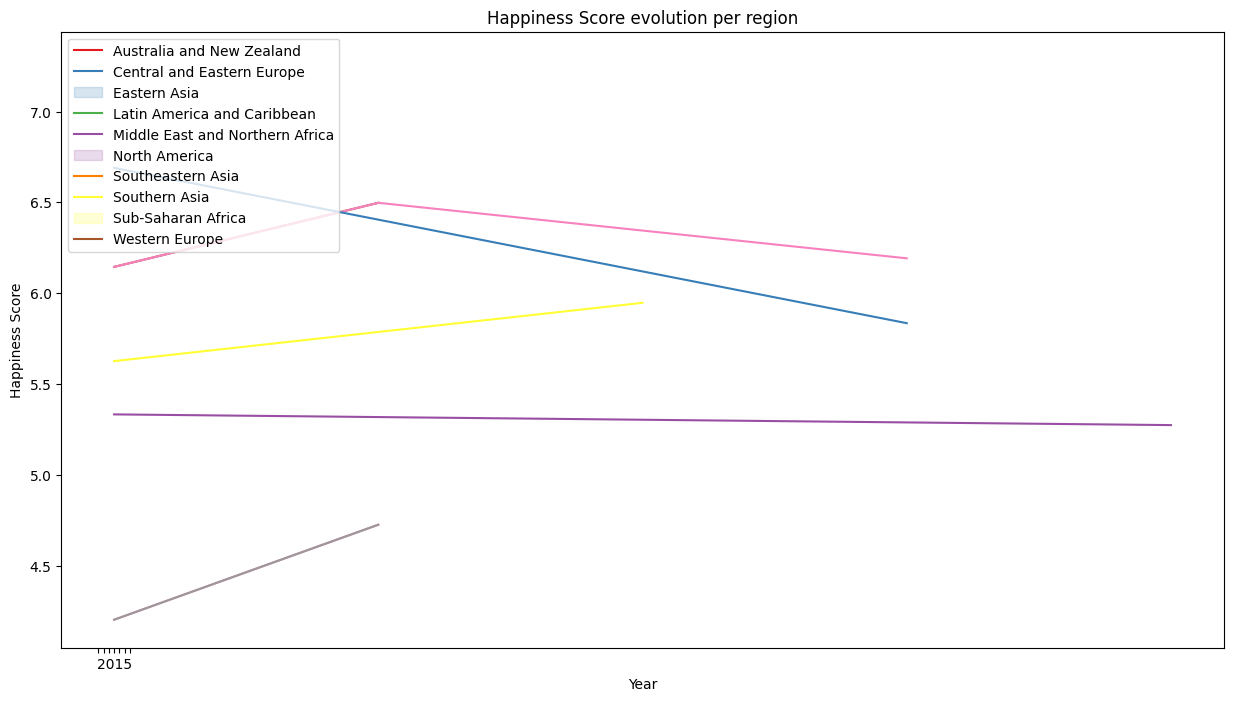

In [628]:
# Let's visualize the evalution of the Happiness Score over the Years (for each Region).

# Set our graph size:                
plt.figure(figsize=(15,8))

for region in df_hs_region_years.index :
    df_hs_region_years.loc[region].plot()
    ax = sns.lineplot(data = df_hs_region_years.loc[region])

# Add labels vertical inclination to improve improve legibility
plt.legend(df_hs_region_years.index,loc="upper left")
plt.title("Happiness Score evolution per region")
plt.ylabel("Happiness Score")

In [629]:
# Define our indicators variable:

indicators = ['Happiness_Score', 'GDP_per_capita',
       'Family', 'Health', 'Freedom', 'Corruption_perception', 'Generosity']
data = df[indicators].dropna()

In [630]:
data.corr()

,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity
Happiness_Score,1.000000,0.764181,0.717134,0.707145,0.566701,0.366505,0.169808
GDP_per_capita,0.764181,1.000000,0.660807,0.816094,0.356842,0.249844,-0.029469
Family,0.717134,0.660807,1.000000,0.567081,0.418652,0.147241,0.066277
Health,0.707145,0.816094,0.567081,1.000000,0.341676,0.207918,0.092302
Freedom,0.566701,0.356842,0.418652,0.341676,1.000000,0.476859,0.350807
Corruption_perception,0.366505,0.249844,0.147241,0.207918,0.476859,1.000000,0.303462
Generosity,0.169808,-0.029469,0.066277,0.092302,0.350807,0.303462,1.000000


<Axes: >

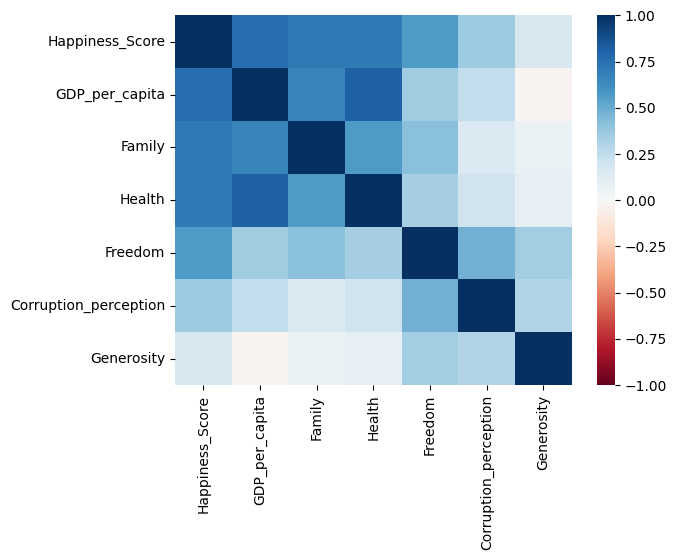

In [631]:
# Correlation matrix visualization:


sns.heatmap(data.corr(), cmap="RdBu", vmin= -1, vmax=1)

In [632]:


from scipy import stats
# GDP_per_capita vs. Happiness_Score:

pearson_coef, p_value = stats.pearsonr(df['GDP_per_capita'], df['Happiness_Score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7641810264337799  with a P-value of P = 1.2635758020860351e-33


In [633]:
# Health vs. Happiness_Score:

pearson_coef, p_value = stats.pearsonr(df['Health'], df['Happiness_Score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7071445627002967  with a P-value of P = 6.2807357923282686e-27


In [634]:
# Freedom vs. Happiness_Score:

pearson_coef, p_value = stats.pearsonr(df['Freedom'], df['Happiness_Score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5667011921597939  with a P-value of P = 9.647282321514715e-16


In [635]:
# Generosity vs. Happiness_Score:

pearson_coef, p_value = stats.pearsonr(df['Generosity'], df['Happiness_Score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.16980793721279225  with a P-value of P = 0.02730187993540022



In our analysis, we've successfully explored the correlation between the Happiness Score and various indicators. The Pearson coefficients reveal strong positive linear relationships between these indicators and the Happiness Score. The low P-values, all below 0.0001, further affirm the statistical significance of these relationships.

Our comprehensive examination provides valuable insights into the nature of our data, highlighting the meaningful impact of certain variables on the target variable, Happiness Score. These findings enhance our understanding of the factors contributing to happiness, paving the way for more informed and targeted analyses or interventions in the future.